<a href="https://colab.research.google.com/github/parthdhakan/Brain-Stroke-Detection/blob/main/Brain_Stroke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT BASED LEARNING

> PARTH DHAKAN, AKSHAT LIMBACHIYA, AMIT MANDALIYA


**Brain Stroke Detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Brain Stroke/full_data.csv')

# INTRO

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df['gender']=df.gender.replace('Male','1.0')
df['gender']=df.gender.replace('Female','2.0')
df['gender']=df.gender.astype(float)
print(df.gender)

0       1.0
1       1.0
2       2.0
3       2.0
4       1.0
       ... 
4976    1.0
4977    1.0
4978    2.0
4979    1.0
4980    2.0
Name: gender, Length: 4981, dtype: float64


In [ ]:
df['work_type']=df.work_type.replace('Private','1.0')
df['work_type']=df.work_type.replace('Self-employed','2.0')
df['work_type']=df.work_type.replace('Govt_job','3.0')
df['work_type']=df.work_type.replace('children','4.0')
df['work_type']=df.work_type.astype(float)
print(df.work_type)

0       1.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
4976    1.0
4977    1.0
4978    3.0
4979    1.0
4980    1.0
Name: work_type, Length: 4981, dtype: float64


In [ ]:
df['Residence_type']=df.Residence_type.replace('Urban','1.0')
df['Residence_type']=df.Residence_type.replace('Rural','2.0')
df['Residence_type']=df.Residence_type.astype(float)
print(df.Residence_type)

0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
4976    2.0
4977    1.0
4978    2.0
4979    2.0
4980    1.0
Name: Residence_type, Length: 4981, dtype: float64


In [ ]:
df['smoking_status']=df.smoking_status.replace('Unknown','1.0')
df['smoking_status']=df.smoking_status.replace('never smoked','2.0')
df['smoking_status']=df.smoking_status.replace('formerly smoked','3.0')
df['smoking_status']=df.smoking_status.replace('smokes','4.0')
df['smoking_status']=df.smoking_status.astype(float)
print(df.smoking_status)

0       3.0
1       2.0
2       4.0
3       2.0
4       3.0
       ... 
4976    3.0
4977    4.0
4978    4.0
4979    4.0
4980    2.0
Name: smoking_status, Length: 4981, dtype: float64


In [ ]:
df['ever_married']=df.ever_married.replace('Yes','1.0')
df['ever_married']=df.ever_married.replace('No','2.0')
df['ever_married']=df.ever_married.astype(float)
print(df.ever_married)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4976    2.0
4977    1.0
4978    1.0
4979    1.0
4980    1.0
Name: ever_married, Length: 4981, dtype: float64


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,1.0,1.0,228.69,36.6,3.0,1
1,1.0,80.0,0,1,1.0,1.0,2.0,105.92,32.5,2.0,1
2,2.0,49.0,0,0,1.0,1.0,1.0,171.23,34.4,4.0,1
3,2.0,79.0,1,0,1.0,2.0,2.0,174.12,24.0,2.0,1
4,1.0,81.0,0,0,1.0,1.0,1.0,186.21,29.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,41.0,0,0,2.0,1.0,2.0,70.15,29.8,3.0,0
4977,1.0,40.0,0,0,1.0,1.0,1.0,191.15,31.1,4.0,0
4978,2.0,45.0,1,0,1.0,3.0,2.0,95.02,31.8,4.0,0
4979,1.0,40.0,0,0,1.0,1.0,2.0,83.94,30.0,4.0,0


# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import sklearn.metrics 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

In [ ]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values

In [ ]:
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   3.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       [  2.  ,  49.  ,   0.  , ..., 171.23,  34.4 ,   4.  ],
       ...,
       [  2.  ,  45.  ,   1.  , ...,  95.02,  31.8 ,   4.  ],
       [  1.  ,  40.  ,   0.  , ...,  83.94,  30.  ,   4.  ],
       [  2.  ,  80.  ,   1.  , ...,  83.75,  29.1 ,   2.  ]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Exploratory Data Analysis

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   float64
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   float64
 5   work_type          4981 non-null   float64
 6   Residence_type     4981 non-null   float64
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   float64
 10  stroke             4981 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 428.2 KB


In [ ]:
print(f'\033[94mNumber of rows: {df.shape[0]}')
print(f'\033[94mNumber of columns: {df.shape[1]}')
print(f'\033[94mNumber of values: {df.count().sum()}')
print(f'\033[94mNumber missing values: {sum(df.isna().sum())}')

Number of rows: 4981
Number of columns: 11
Number of values: 54791
Number missing values: 0


In [ ]:
print(
    "age: ", df['age'].unique(),
    "\n",
    "\n",
    "gender: ", df['gender'].unique(),
    "\n",
    "\n",
    "hypertension: ", df['hypertension'].unique(),
    "\n",
    "\n",
    "heart_disease: ", df['heart_disease'].unique(),
    "\n",
    "\n",
    "ever_married: ", df['ever_married'].unique(),
    "\n",
    "\n",
    "work_type: ", df['work_type'].unique(),
    "\n",
    "\n",
    "Residence_type: ", df['Residence_type'].unique(),
    "\n",
    "\n",
    "avg_glucose_level: ", df['avg_glucose_level'].unique(),
    "\n",
    "\n",
    "bmi: ", df['bmi'].unique(),
    "\n",
    "\n",
    "smoking_status: ", df['smoking_status'].unique(),
    "\n",
    "\n"
    "stroke: ", df['stroke'].unique()
)

age:  [6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 1.32e+00 1.60e-01 4.80e-01] 
 
 gender:  [1. 2.] 
 
 hypertension:  [0 1

# VISUALIZATIONS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


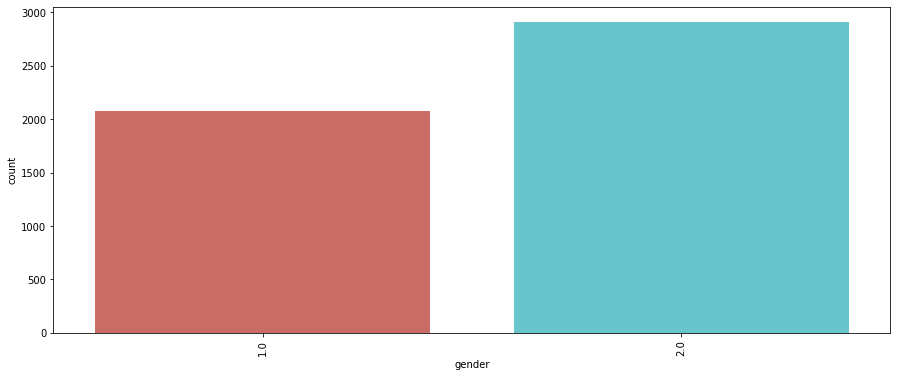

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


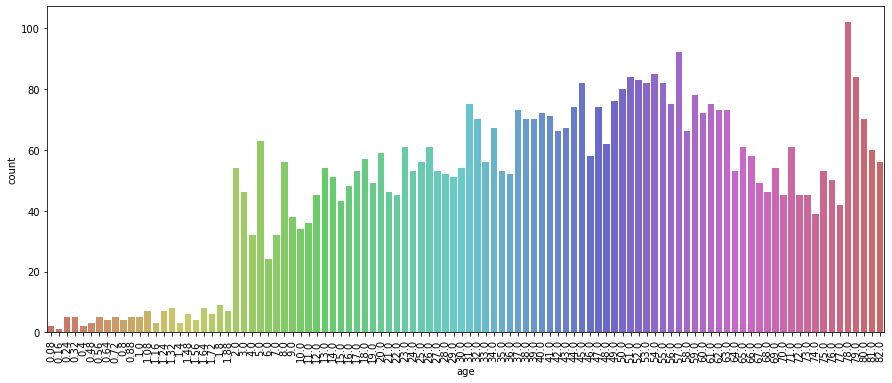

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


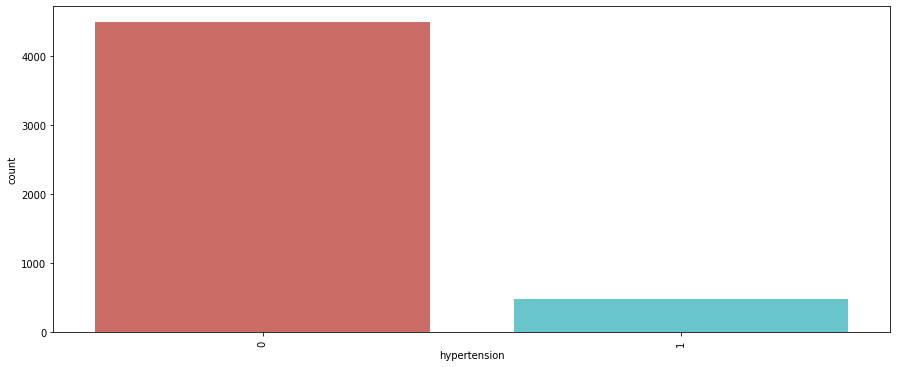

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


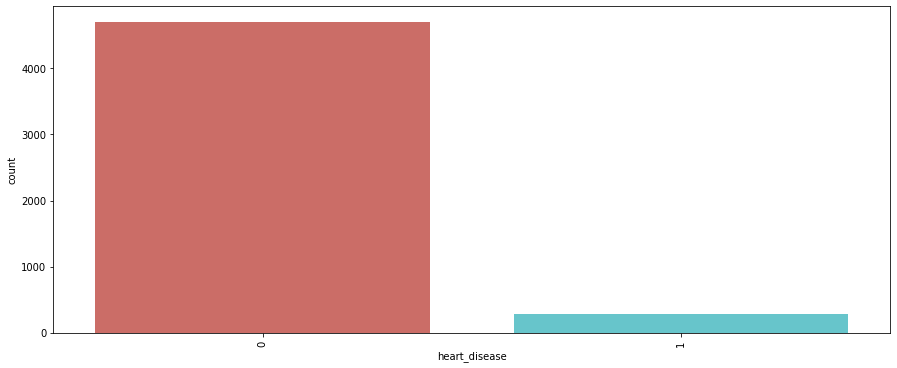

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


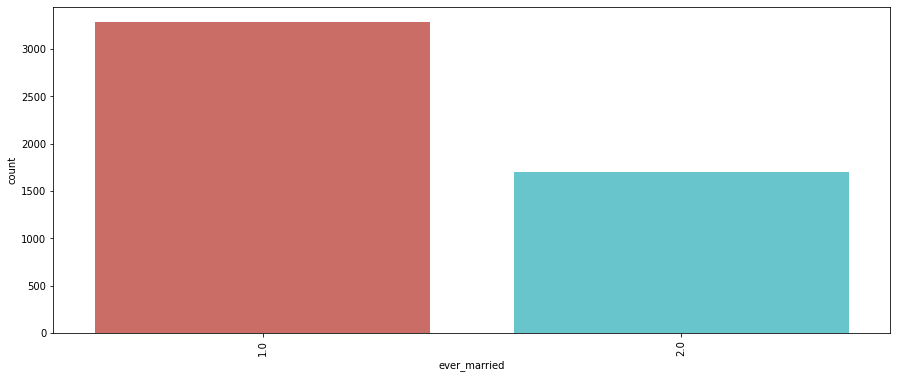

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


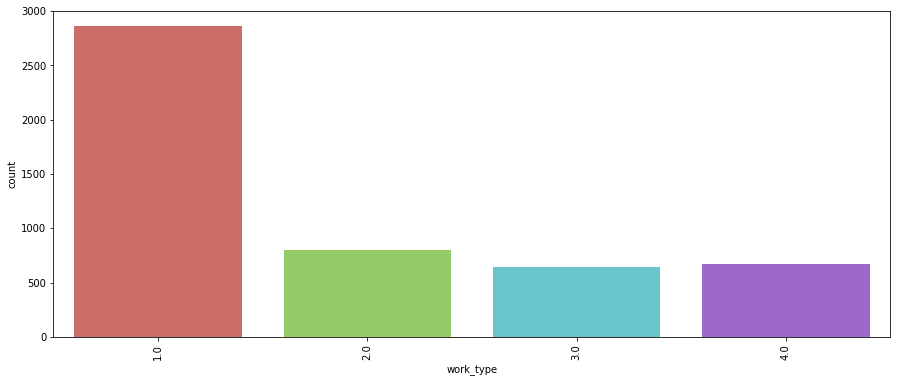

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


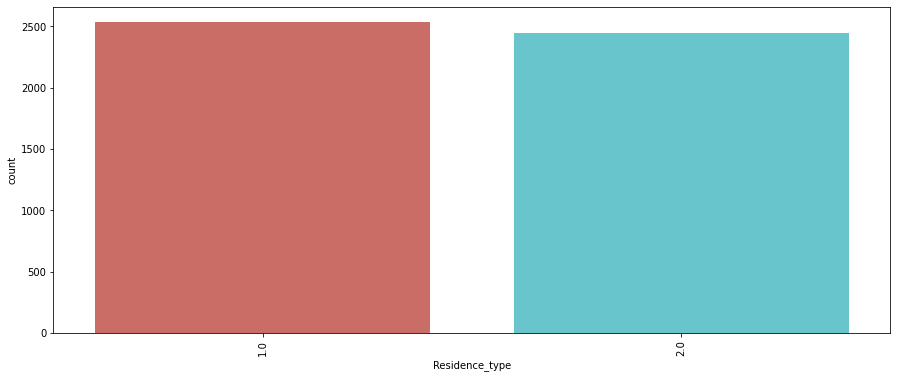

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


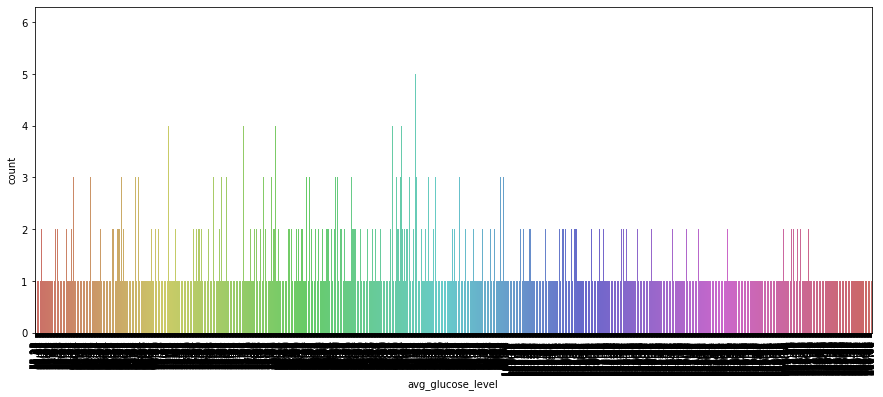

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


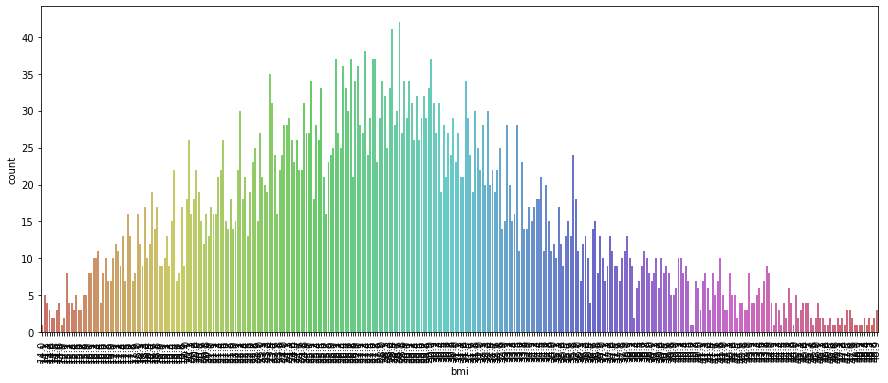

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


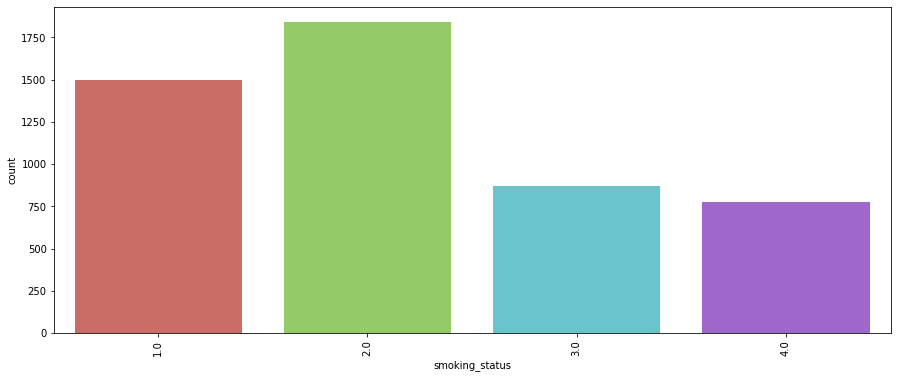

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


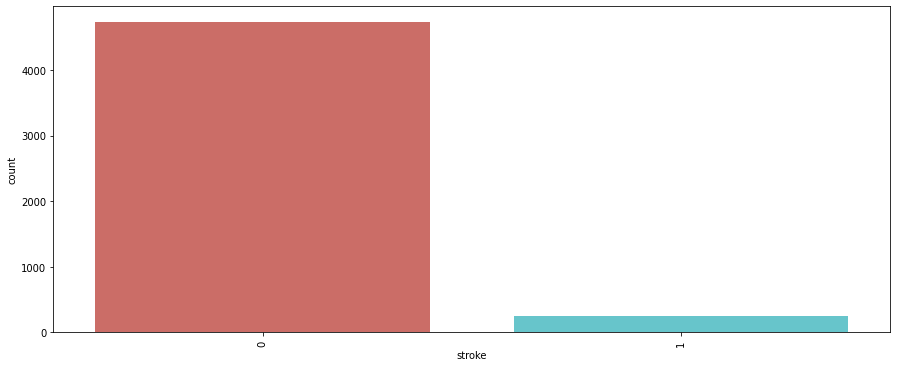

In [ ]:
for i in df.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(df[i], data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

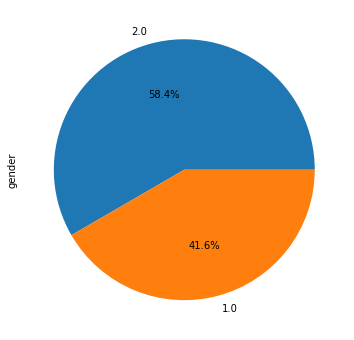

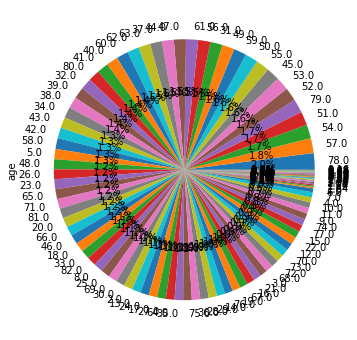

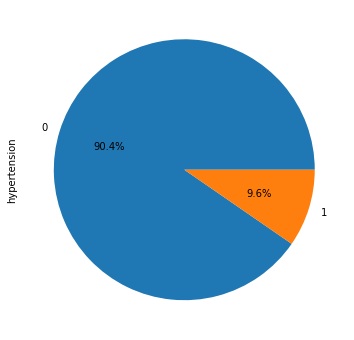

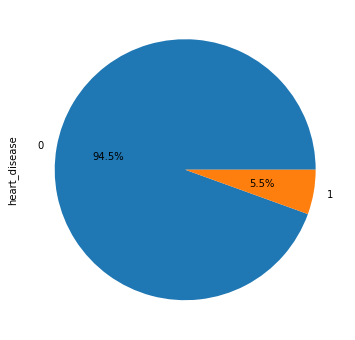

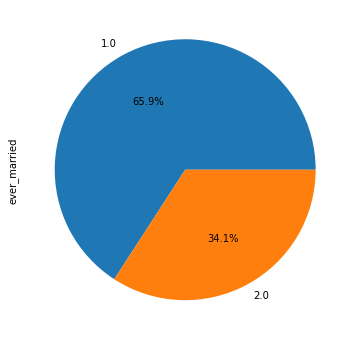

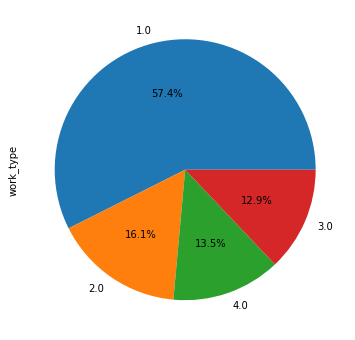

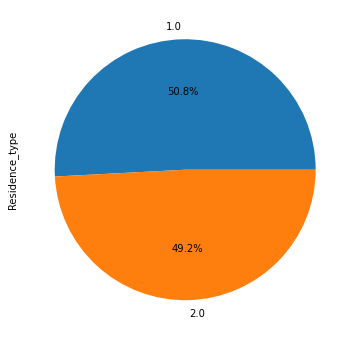

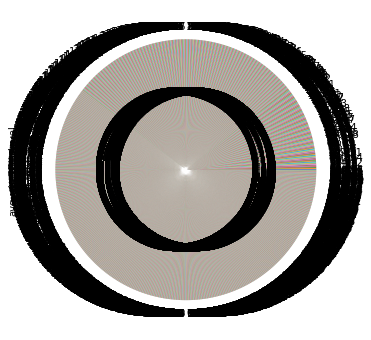

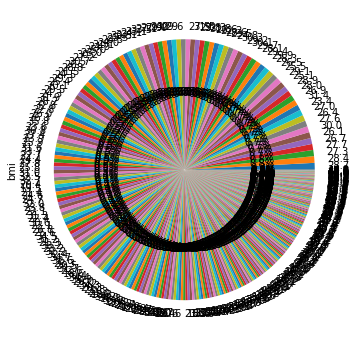

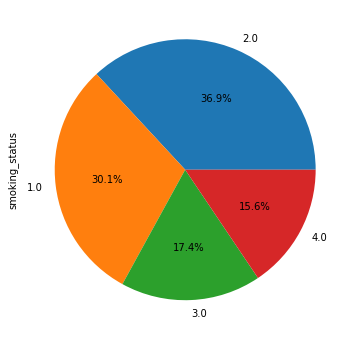

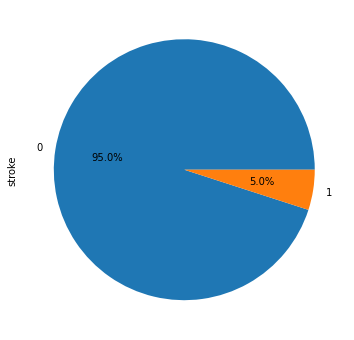

In [ ]:
for i in df.columns:
    plt.figure(figsize = (15,6))
    df[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


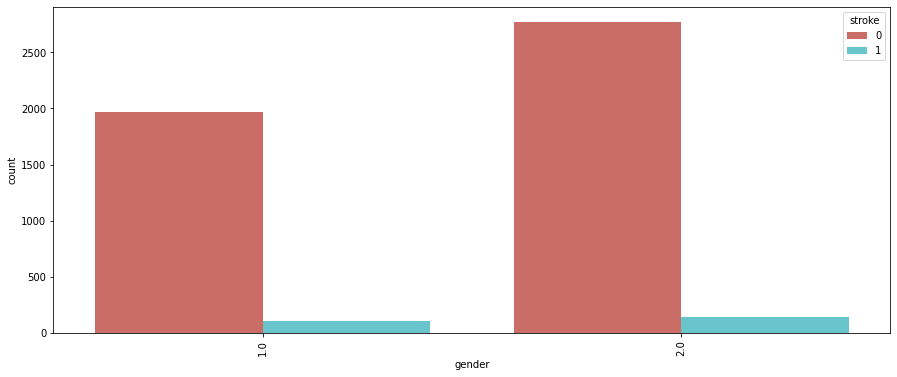

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


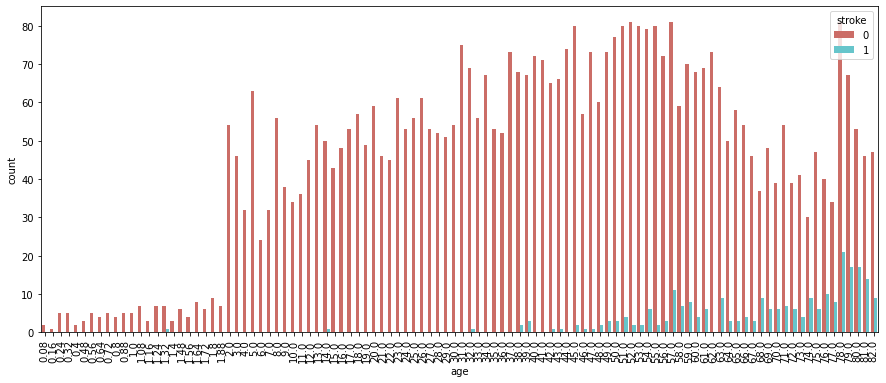

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


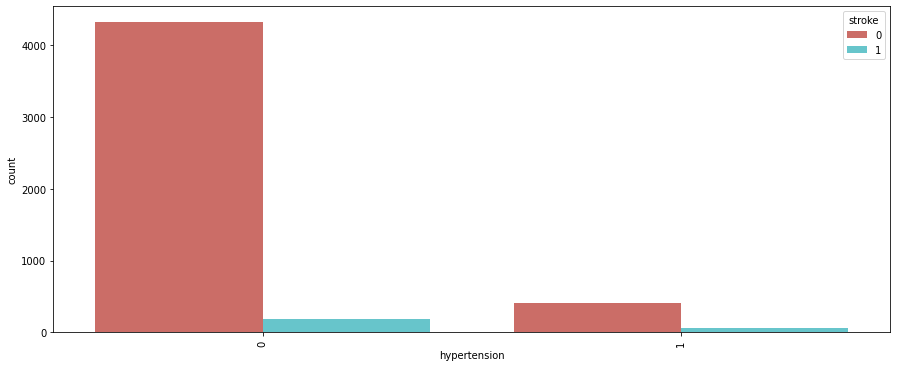

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


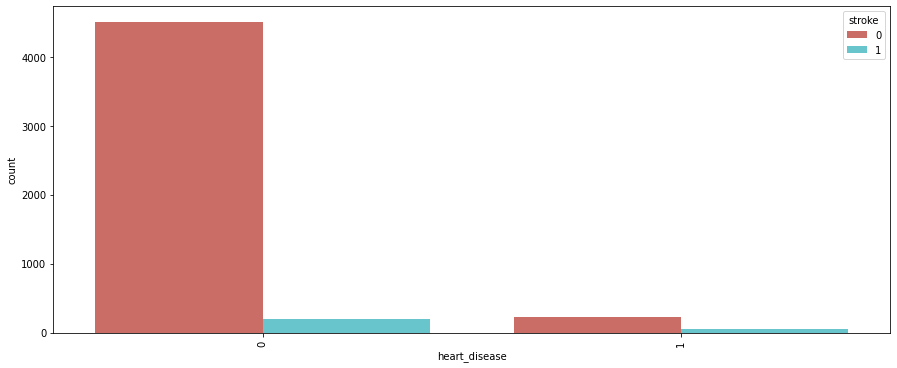

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


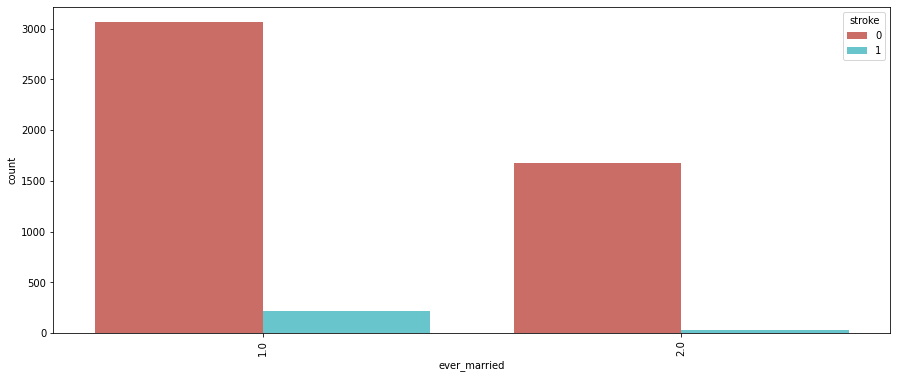

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


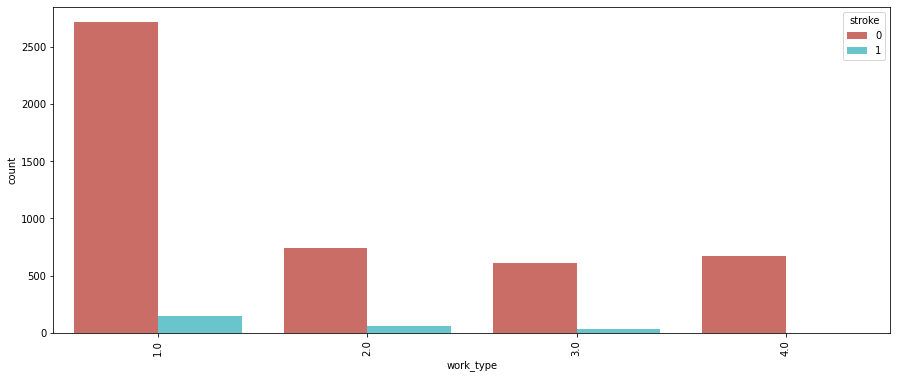

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


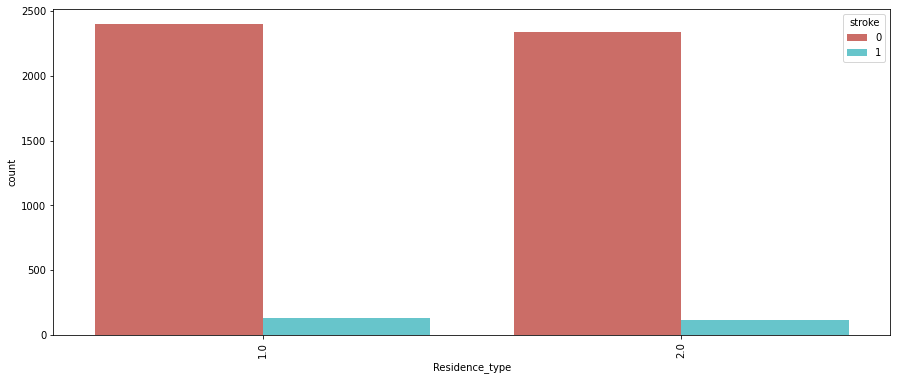

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


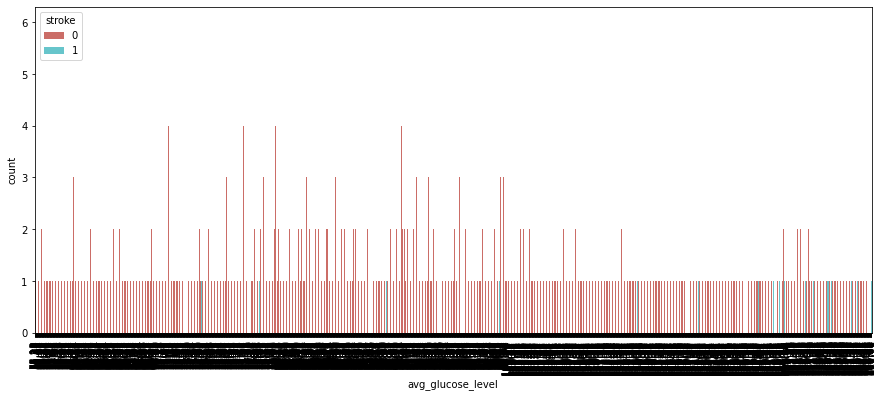

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


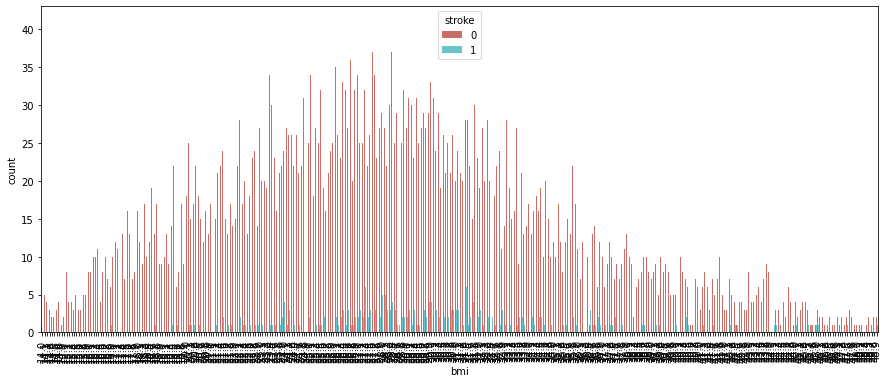

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


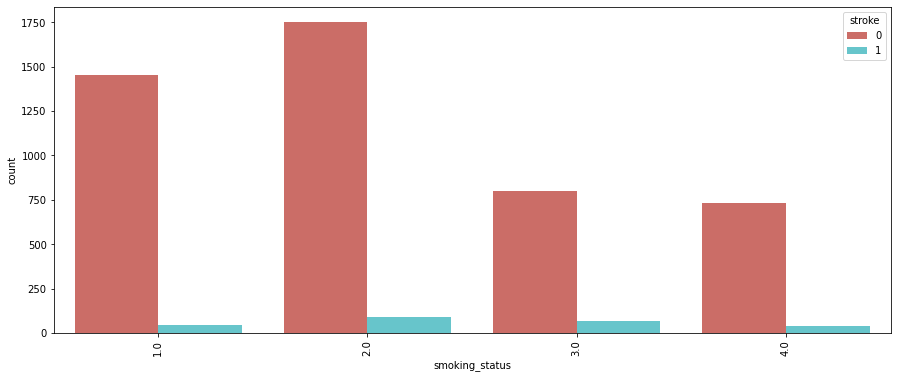

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


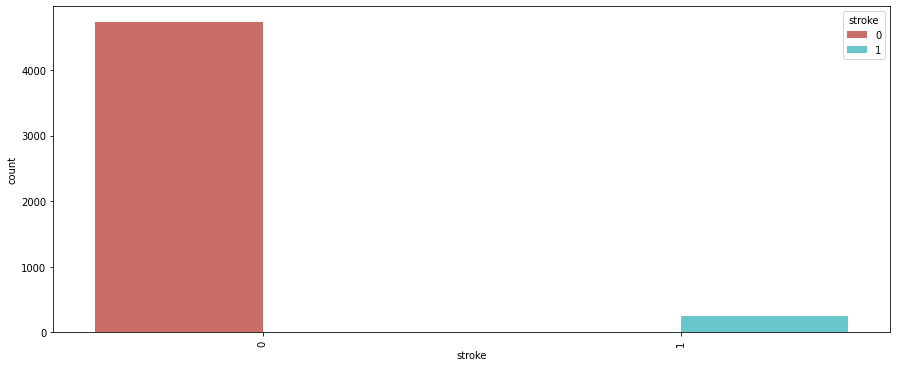

In [ ]:
for i in df.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(df[i], data = df, hue = 'stroke' , palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

# TRAIN TEST SPLITTING

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

# MinMax Scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("X_train: ", X_train)
print("X_test: ", X_test)

X_train:  [[1.         0.41348974 0.         ... 0.15793684 0.28366762 0.33333333]
 [0.         0.48680352 1.         ... 0.17920843 0.30945559 1.        ]
 [0.         0.19354839 0.         ... 0.11967622 0.2722063  1.        ]
 ...
 [1.         0.64565005 0.         ... 0.02658949 0.42120344 1.        ]
 [1.         0.53567937 0.         ... 0.1460304  0.20916905 0.33333333]
 [0.         0.54789834 1.         ... 0.16617253 0.73638968 1.        ]]
X_test:  [[0.         0.91446725 0.         ... 0.11468775 0.4269341  0.        ]
 [1.         0.58455523 0.         ... 0.73918773 0.94269341 0.33333333]
 [1.         0.85337243 1.         ... 0.46816321 0.41547278 0.66666667]
 ...
 [0.         0.09579668 0.         ... 0.29902584 0.06017192 0.        ]
 [0.         0.5601173  0.         ... 0.01651842 0.61031519 0.33333333]
 [0.         0.63343109 0.         ... 0.14560685 0.43553009 0.66666667]]


In [ ]:
X_test.size

14950

In [ ]:
y_test.size

1495

# SMOTE TECHNIQUE

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 174
Before OverSampling, counts of label '0': 3312 

After OverSampling, the shape of train_X: (6624, 10)
After OverSampling, the shape of train_y: (6624,) 

After OverSampling, counts of label '1': 3312
After OverSampling, counts of label '0': 3312


In [ ]:
print(sum(y_train_res==1))
print(sum(y_train_res==0))

3312
3312


In [ ]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train_res))
print("Number of no Stroke in oversampled data",len(y_train_res[y_train_res==0]))
print("Number of Stroke",len(y_train_res[y_train_res==1]))
print("Proportion of no Stroke data in oversampled data is ",len(y_train_res[y_train_res==0])/len(X_train_res))
print("Proportion of Stroke data in oversampled data is ",len(y_train_res[y_train_res==1])/len(X_train_res))


length of oversampled data is  6624
Number of no Stroke in oversampled data 3312
Number of Stroke 3312
Proportion of no Stroke data in oversampled data is  0.5
Proportion of Stroke data in oversampled data is  0.5


In [ ]:
np.unique(y_train_res, return_counts=True)

(array([0, 1]), array([3312, 3312]))

In [ ]:
print(X_train_res[:5])

[[1.         0.41348974 0.         0.         0.         0.33333333
  1.         0.15793684 0.28366762 0.33333333]
 [0.         0.48680352 1.         0.         0.         0.33333333
  0.         0.17920843 0.30945559 1.        ]
 [0.         0.19354839 0.         0.         1.         0.
  0.         0.11967622 0.2722063  1.        ]
 [0.         0.41348974 0.         0.         0.         0.
  1.         0.1477246  0.45558739 0.66666667]
 [1.         0.00195503 0.         0.         1.         1.
  0.         0.25182362 0.16045845 0.        ]]


# INDIVIDUAL ALGORITHMS

# Logistic Regression

Default

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1071  350]
 [  17   57]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1421
           1       0.14      0.77      0.24        74

    accuracy                           0.75      1495
   macro avg       0.56      0.76      0.55      1495
weighted avg       0.94      0.75      0.82      1495



Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


# Define the parameter distribution
param_dist = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500,5000]}

# Create an instance of the RandomizedSearchCV class
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_res, y_train_res)

# Print the best parameters and the best score
print(random_search.best_params_)
print(random_search.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

{'solver': 'sag', 'penalty': 'none', 'max_iter': 100, 'C': 11.288378916846883}
0.7927246195063559


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver sa

In [ ]:
logreg_rscv = LogisticRegression(solver= 'saga', penalty= 'none', max_iter= 2500, C= 0.001)
logreg_rscv.fit(X_train_res, y_train_res)
y_pred_rscv = logreg_rscv.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg_rscv.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75652


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lrrscv = confusion_matrix(y_test, y_pred_rscv)
print(confusion_matrix_lrrscv)

[[1074  347]
 [  17   57]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rscv))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1421
           1       0.14      0.77      0.24        74

    accuracy                           0.76      1495
   macro avg       0.56      0.76      0.55      1495
weighted avg       0.94      0.76      0.82      1495



# **SVM**

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'linear', random_state= 0)
clf_svm.fit(X_train_res ,y_train_res)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svm = clf_svm.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svm_d = confusion_matrix(y_test, y_pred_svm)

In [ ]:
print(cm_svm_d)

[[1051  370]
 [  14   60]]


In [ ]:
from sklearn.metrics import classification_report
svm_def_report = classification_report(y_test,y_pred_svm)
print(svm_def_report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1421
           1       0.14      0.81      0.24        74

    accuracy                           0.74      1495
   macro avg       0.56      0.78      0.54      1495
weighted avg       0.94      0.74      0.82      1495



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_def = accuracy_score(y_test,y_pred_svm)
print("Default accuracy: ", accuracy_def)

Default accuracy:  0.7431438127090301


Tuning parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

parameters = [{'C': [0.01, 0.1, 1], 'kernel': ['linear'], 'gamma': ['scale','auto'] },
              {'C': [0.01, 0.1, 1], 'kernel': ['rbf'], 'gamma': ['scale','auto']},
              {'C': [0.01, 0.1, 1], 'kernel': ['sigmoid'], 'gamma': ['scale','auto']},
              {'C': [0.01, 0.1, 1], 'kernel': ['poly'], 'gamma': ['scale','auto']},
              ]
rand_search = RandomizedSearchCV(estimator = clf_svm,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_iter = 100,
                           n_jobs = -1)
rand_search = rand_search.fit(X_train_res, y_train_res)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
rand_search.best_params_


{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}

In [ ]:
print("Best Score: ",rand_search.best_score_)

Best Score:  0.839072906572422


In [ ]:
clf_svm_rs = SVC(kernel = 'rbf', gamma = 'scale', C= 1)
clf_svm_rs.fit(X_train_res ,y_train_res)
y_pred_svm_rs = clf_svm_rs.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svm_rs = confusion_matrix(y_test, y_pred_svm_rs)

In [ ]:
print(cm_svm_rs)

[[1051  370]
 [  14   60]]


In [ ]:
# from sklearn.metrics import classification_report
svm_rs_report = classification_report(y_test,y_pred_svm_rs)
print(svm_rs_report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1421
           1       0.14      0.81      0.24        74

    accuracy                           0.74      1495
   macro avg       0.56      0.78      0.54      1495
weighted avg       0.94      0.74      0.82      1495



In [ ]:
accuracy_rs = accuracy_score(y_test,y_pred_svm_rs)
print("Randomized Search accuracy: ", accuracy_rs)

Randomized Search accuracy:  0.7431438127090301


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
# define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt','log2','None'],
              'criterion': ['gini', 'entropy']}

# create an instance of the RandomForestClassifier
clf_rf = RandomForestClassifier()

# create an instance of the RandomizedSearchCV class
random_search = RandomizedSearchCV(estimator=clf_rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# fit the RandomizedSearchCV class to the data
random_search.fit(X_train_res, y_train_res)

# get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_p

Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_clf=RandomForestClassifier(n_estimators= 50, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', max_depth= 20, criterion= 'gini')
rand_clf.fit(X_train_res,y_train_res)
y_pred_rf=rand_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

Accuracy: 90.70%


In [ ]:
print('Training-set accuracy score:', rand_clf.score(X_train_res, y_train_res))
print('Testing-set accuracy score:', rand_clf.score(X_test, y_test))

Training-set accuracy score: 0.9992451690821256
Testing-set accuracy score: 0.9070234113712374


In [ ]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[1342,   79],
       [  60,   14]])

In [ ]:
from sklearn.metrics import classification_report
rand_report=classification_report(y_test, y_pred_rf)

In [ ]:
print(rand_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1421
           1       0.15      0.19      0.17        74

    accuracy                           0.91      1495
   macro avg       0.55      0.57      0.56      1495
weighted avg       0.92      0.91      0.91      1495



# **XGBOOST**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 30,nthread=4,scale_pos_weight=1,seed=27,reg_alpha=0.005,min_child_weight=6,gamma=0,subsample=0.8)
xgb_clf.fit(X_train_res, y_train_res)
y_pred_xgb=xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 77.59%


In [ ]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
cm_xgb

array([[1113,  308],
       [  27,   47]])

In [ ]:
xgb_report = classification_report(y_test,y_pred_xgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1421
           1       0.13      0.64      0.22        74

    accuracy                           0.78      1495
   macro avg       0.55      0.71      0.54      1495
weighted avg       0.93      0.78      0.84      1495



# **LightGBM**

In [ ]:
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier(random_state=42, class_weight='balanced', learning_rate= 0.001, max_depth= 5, min_child_samples= 10, num_leaves= 100, reg_alpha= 0)
clf_lgb.fit(X_train_res, y_train_res)
predictions_lgb = clf_lgb.predict(X_test)
accuracy_lgb = clf_lgb.score(X_test, y_test)
print('Accuracy:', accuracy_lgb)
report_lgb=classification_report(y_test,predictions_lgb)
print(report_lgb)

Accuracy: 0.7946488294314381
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1421
           1       0.13      0.57      0.21        74

    accuracy                           0.79      1495
   macro avg       0.55      0.69      0.55      1495
weighted avg       0.93      0.79      0.85      1495



In [ ]:
lgb_cm = confusion_matrix(y_test,predictions_lgb)
lgb_cm

array([[1146,  275],
       [  32,   42]])

# **PROPOSED METHOD**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
level0=[]

level0.append(('svm', SVC(kernel = 'linear', random_state= 0)))
level0.append(('rf', RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, criterion= 'entropy')))
level0.append(('lgb', lgb.LGBMClassifier(random_state=42, class_weight='balanced', learning_rate= 0.001, max_depth= 5, min_child_samples= 10, num_leaves= 100, reg_alpha= 0)))
level0.append(('xgb', xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.01,
              max_depth = 5, alpha = 10, n_estimators = 30,nthread=4,scale_pos_weight=1,seed=27,reg_alpha=0.005,min_child_weight=6,gamma=0,subsample=0.8)))

# Meta model
level1 = LogisticRegression(solver= 'saga', penalty= 'none', max_iter= 2500, C= 0.001)

model_stacked_Final = StackingClassifier(estimators = level0, final_estimator=level1, cv=5)

model_stacked_Final.fit(X_train_res, y_train_res)

predictions_stacking_final = model_stacked_Final.predict(X_test)

print("Accuracy for Stacking = ", accuracy_score(y_test, predictions_stacking_final))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy for Stacking =  0.925752508361204
Predicted Class: 1


In [ ]:
stacking_cm_final = confusion_matrix(y_test,predictions_stacking_final)
stacking_cm_final

array([[1373,   48],
       [  63,   11]])

In [ ]:
report_stacking_final=classification_report(y_test,predictions_stacking_final)
print(report_stacking_final)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1421
           1       0.19      0.15      0.17        74

    accuracy                           0.93      1495
   macro avg       0.57      0.56      0.56      1495
weighted avg       0.92      0.93      0.92      1495

